# Imports and plotting format

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from functions import conformers

from functions.plotting import plot_conformers

import warnings
warnings.filterwarnings("ignore")

/Users/jamie/opt/anaconda3/envs/bisphos_conf_sel/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
paramsscreen = {'backend': 'ps',
            'axes.labelsize': 15,
           'legend.fontsize': 15,
           'xtick.labelsize': 13,
           'ytick.labelsize': 13,
           'axes.titlesize': 16}

plt.rcParams.update(paramsscreen)

# Define paths and ligand IDs

In [3]:
full_5kcal = Path("./calculation_files/crest/5kcal_full")
clustered_5kcal = Path("./calculation_files/crest/5kcal_clustered")
full_10kcal = Path("./calculation_files/crest/10kcal_full")
clustered_10kcal = Path("./calculation_files/crest/10kcal_clustered")

In [4]:
ligands = ["pp000067", "pp000085", "pp000091", "pp000110", "pp000133", "pp000135",
           "pp000298", "pp000321", "pp000390", "pp000425", "pp000458", "pp000670"]

# Plot bar graphs of ensemble sizes

## Get lists of numbers of conformers by ligand id

In [ ]:
# 5 kcal/mol full ensemble
full_5kcal_no_conformers = []
for ligand in ligands:
    no_conformers = conformers.count_conformer_number(full_5kcal, ligand)
    full_5kcal_no_conformers.append(no_conformers)

# 5 kcal/mol clustered ensemble
clustered_5kcal_no_conformers = []
for ligand in ligands:
    no_conformers = conformers.count_conformer_number(clustered_5kcal, ligand)
    clustered_5kcal_no_conformers.append(no_conformers)

# 10 kcal/mol full ensemble
full_10kcal_no_conformers = []
for ligand in ligands:
    no_conformers = conformers.count_conformer_number(full_10kcal, ligand)
    full_10kcal_no_conformers.append(no_conformers)

# 10 kcal/mol clustered ensemble
clustered_10kcal_no_conformers = []
for ligand in ligands:
    no_conformers = conformers.count_conformer_number(clustered_10kcal, ligand)
    clustered_10kcal_no_conformers.append(no_conformers)

## Setup plotting dictionary

In [ ]:
# comment out the following lines to exclude from plotting

plotting_dictionary = {"5kcal_full": full_5kcal_no_conformers,
                          "5kcal_clustered": clustered_5kcal_no_conformers,
                          "10kcal_full": full_10kcal_no_conformers,
                          "10kcal_clustered": clustered_10kcal_no_conformers,
                        }

## Plot conformer bar graph

In [ ]:
plot_conformers.bar_graph(ligands, plotting_dictionary)  # add save=True to save the figure

# determine the average number of conformers in each of the above lists
print("Average number of conformers in 5 kcal/mol full ensemble: ", np.average(full_5kcal_no_conformers))
print("Average number of conformers in 5 kcal/mol clustered ensemble: ", np.average(clustered_5kcal_no_conformers))
print("Average number of conformers in 10 kcal/mol full ensemble: ", np.average(full_10kcal_no_conformers))
print("Average number of conformers in 10 kcal/mol clustered ensemble: ", np.average(clustered_10kcal_no_conformers))

# Ensemble RMSD analysis

In [5]:
# define paths where files for the 1 file per ligand are stored

full_5kcal_1file = Path("./calculation_files/crest/5kcal_full_1file")
clustered_5kcal_1file = Path("./calculation_files/crest/5kcal_clustered_1file")
full_10kcal_1file = Path("./calculation_files/crest/10kcal_full_1file")
clustered_10kcal_1file = Path("./calculation_files/crest/10kcal_clustered_1file")

  8%|███▋                                        | 1/12 [00:00<00:01,  9.45it/s]

pp000067 5kcal_full_1file mean: 0.783923768771763, std: 0.3002741091017668, range: 1.3059495072744622
pp000067 10kcal_full_1file mean: 1.218506032604776, std: 0.29501274656366966, range: 1.8193245602451604
pp000085 5kcal_full_1file mean: 0.7098533380058828, std: 0.48083904930995525, range: 3.2251956195327462
pp000085 10kcal_full_1file mean: 1.2314033063521455, std: 1.0061812369863095, range: 4.19712626637841
pp000091 5kcal_full_1file mean: 2.534909784302269, std: 0.9859947407293403, range: 3.9274984709096916
pp000091 10kcal_full_1file mean: 2.1799216942007673, std: 0.49067696729107185, range: 3.7500577857409123


 42%|██████████████████▎                         | 5/12 [00:00<00:00, 11.59it/s]

pp000110 5kcal_full_1file mean: 0.8375221634499747, std: 0.4243141863249316, range: 2.4339407094264716
pp000110 10kcal_full_1file mean: 1.0494334521637183, std: 0.38031536722788045, range: 1.9487180142674267
pp000133 5kcal_full_1file mean: 0.9088674245655302, std: 0.6084337887989293, range: 2.317769311316996
pp000133 10kcal_full_1file mean: 0.981075010676603, std: 0.5701595847033446, range: 2.281333060191887


 58%|█████████████████████████▋                  | 7/12 [00:00<00:00,  6.92it/s]

pp000135 5kcal_full_1file mean: 2.9358370866119308, std: 0.9077127656541443, range: 5.026319396684309
pp000135 10kcal_full_1file mean: 3.3220471695738136, std: 0.9693714068979118, range: 5.032250118912165
pp000298 5kcal_full_1file mean: 0.817397833606245, std: 0.4231867099291096, range: 1.4609853566515634
pp000298 10kcal_full_1file mean: 0.7297032458812593, std: 0.3589697797561403, range: 1.3646401465902327
pp000321 5kcal_full_1file mean: 1.3515811619158635, std: 0.6498613913611185, range: 2.156553873218085
pp000321 10kcal_full_1file mean: 1.8514393887798513, std: 0.4842699309663475, range: 2.554453654926193


 75%|█████████████████████████████████           | 9/12 [00:01<00:00,  8.60it/s]

pp000390 5kcal_full_1file mean: 1.4300666495097911, std: 0.4347826187822215, range: 2.2360047129405465
pp000390 10kcal_full_1file mean: 2.42083780645336, std: 0.4474731864327697, range: 2.936470643988549
pp000425 5kcal_full_1file mean: 1.2393493115587289, std: 0.7052654657978985, range: 3.9821615057047897
pp000425 10kcal_full_1file mean: 2.045588922911899, std: 0.8024652974774089, range: 4.593777463144664


100%|███████████████████████████████████████████| 12/12 [00:01<00:00,  8.77it/s]

pp000458 5kcal_full_1file mean: 1.0392510687122, std: 0.4511395366458815, range: 2.7008730055632246
pp000458 10kcal_full_1file mean: 1.6009339334130466, std: 0.6377850561801834, range: 2.779045277102421
pp000670 5kcal_full_1file mean: 1.3794639471513257, std: 0.5166310935195728, range: 3.1132242809126716
pp000670 10kcal_full_1file mean: 1.0289880118165378, std: 0.622247298983176, range: 3.211336155536774


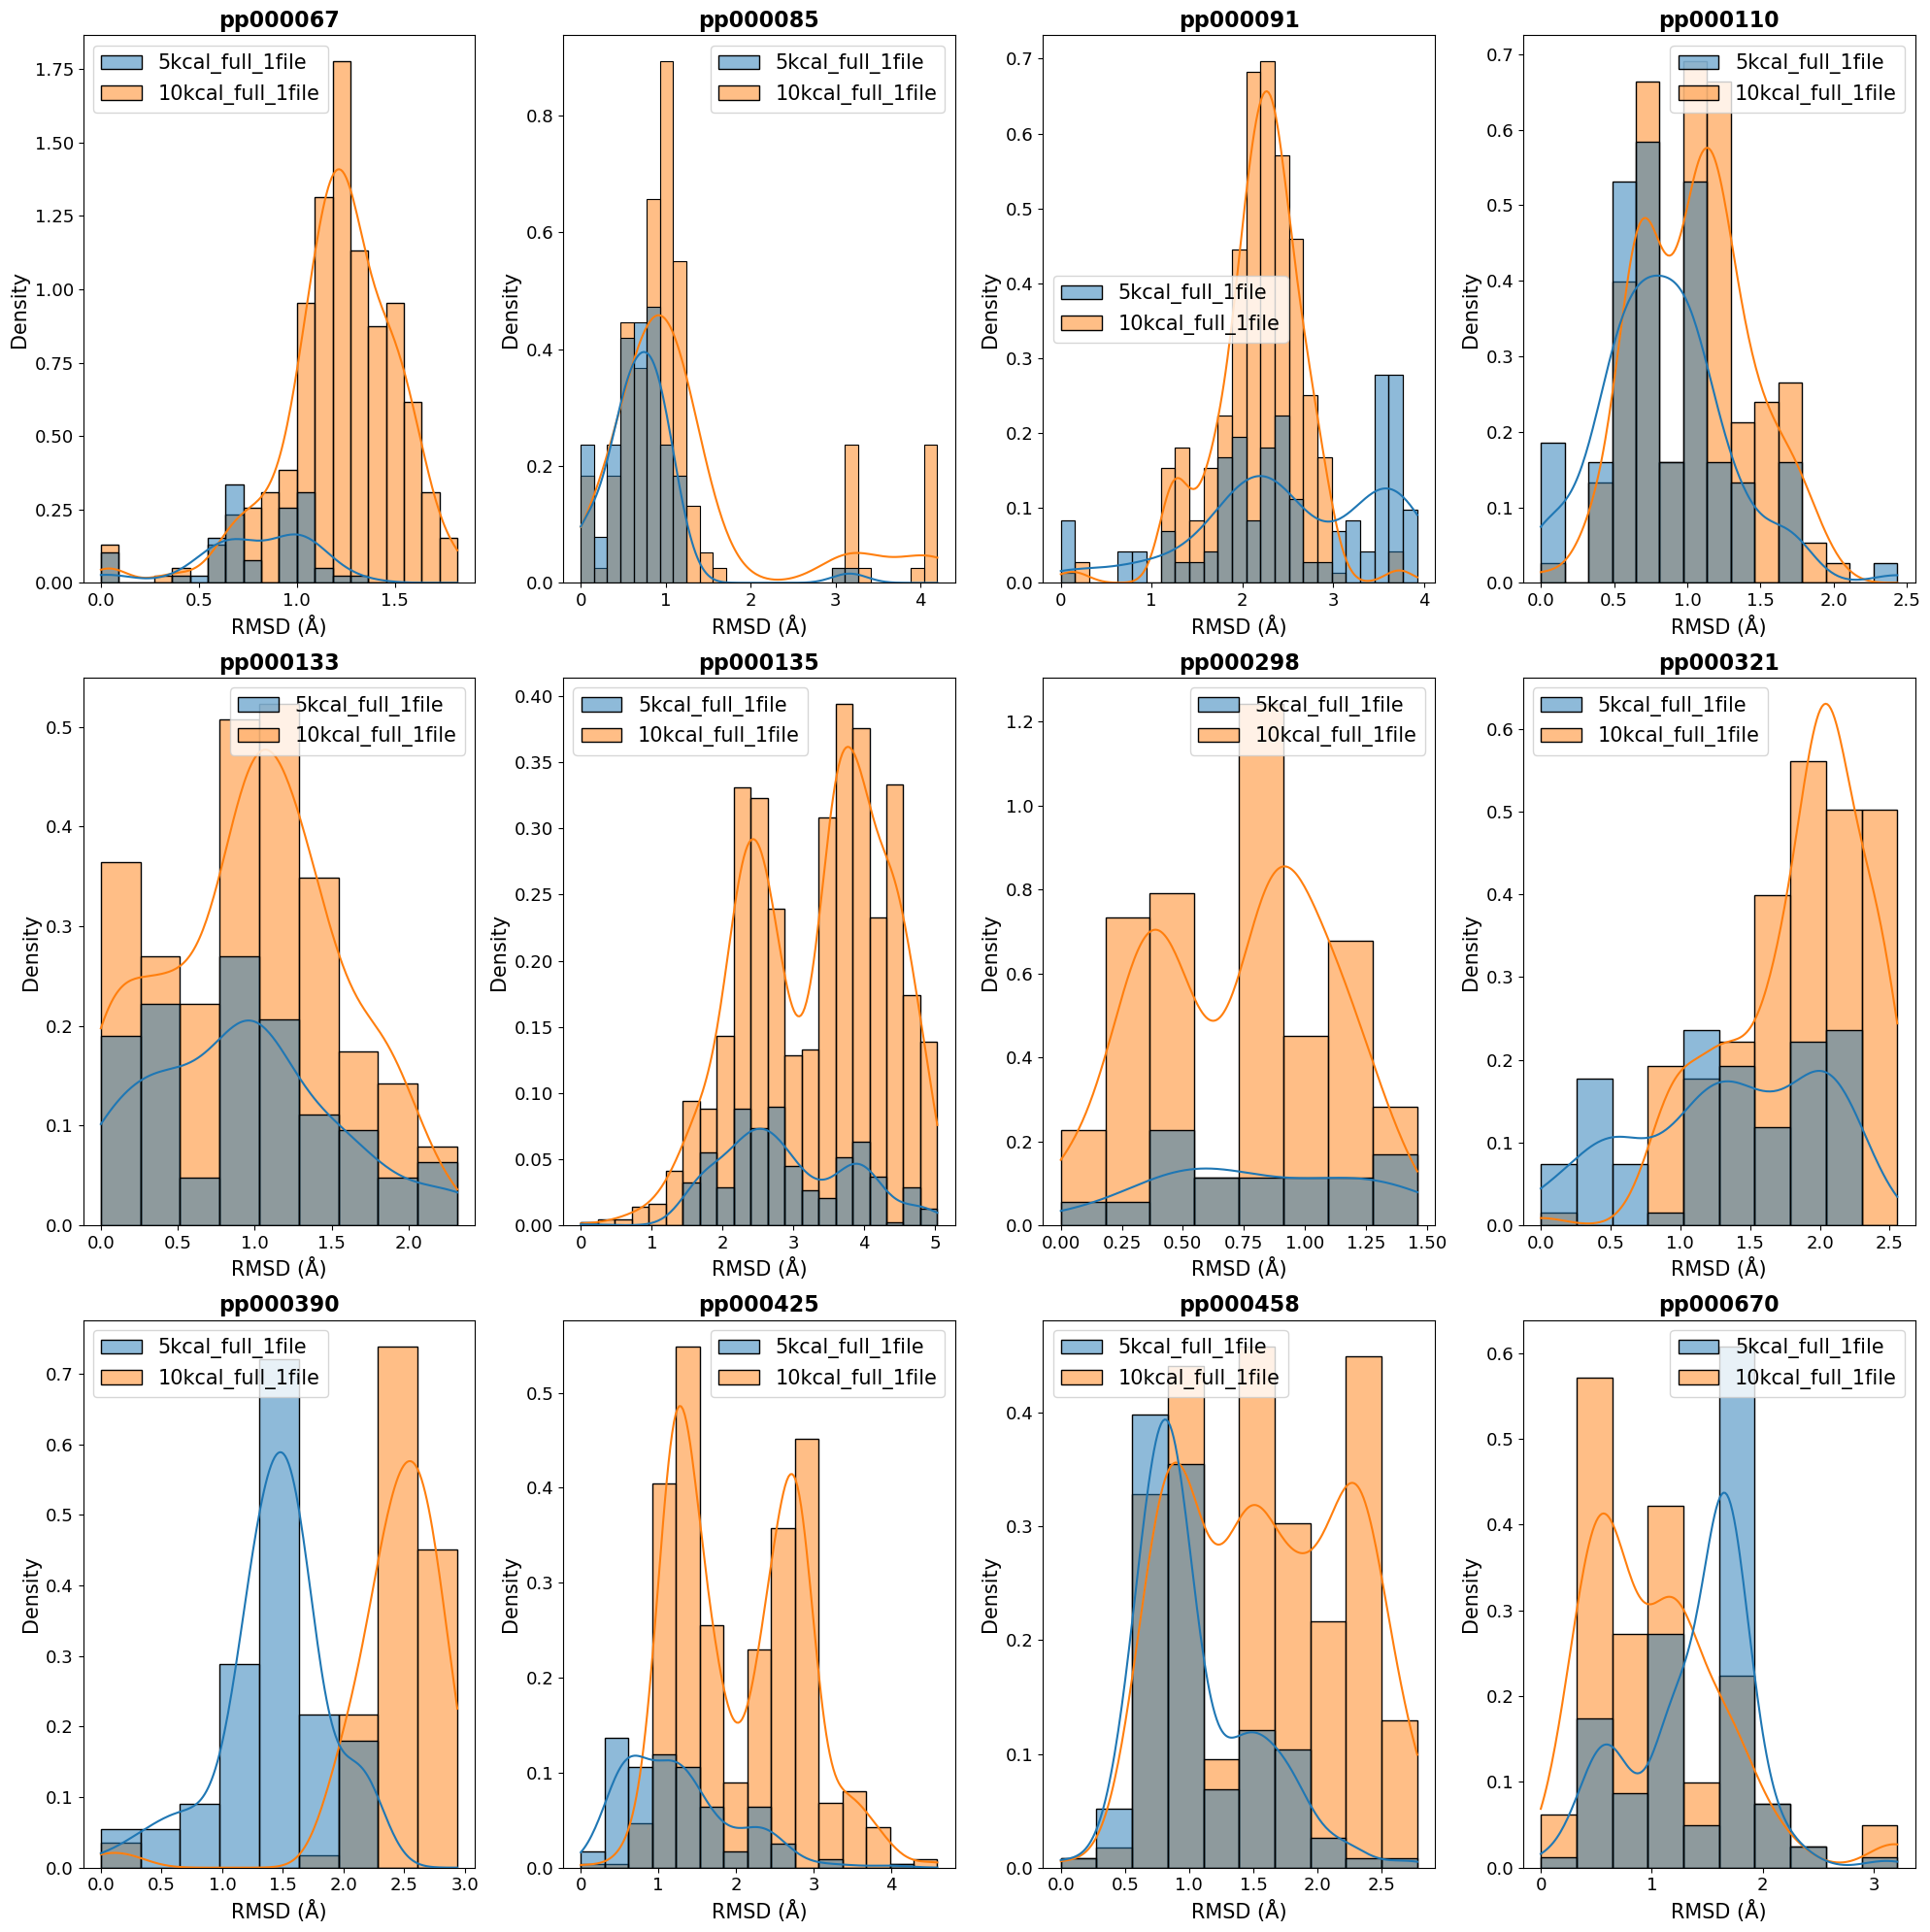

In [6]:
# change set 1 and set 2 to the desired paths to compare different ensembles
# set save=True to save the figure

plot_conformers.rmsd_analysis(ligands, set1=full_5kcal_1file, set2=full_10kcal_1file)